# 1. Понимание цели
## 1.1 Цель:
Предсказание качества вина на основе физико-химического состава.
## 1.2 Описание:
Набор данных относящийся к белому и красному вариантам португальских вин. Данные содержат физико-химические и органолептические признаки, по которым вино можно отнести к первому или второму типу. Этот набор данных можно рассматривать для задачи классификации или регрессии. Реализуем задачу по предсказанию качества вина, на основе физико-химического состава.

Входные переменные (на основе физико-химических тестов):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
Выходная переменная (на основе данных):  
12 - quality (score between 0 and 10)  

# 2. Понимание данных

## 2.1 Импорт библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2.2 Загрузка данных

In [ ]:
data = pd.read_csv('winequalityN.csv')

In [ ]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 2.3 Проверка на пропуски

In [ ]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
total_entries = (data.shape[0] * data.shape[1])
missing_entries_max = data.isnull().sum().sum()
missing_entries_max_percentage = (missing_entries_max / total_entries) * 100

print(f"Total entries in the dataset: %i" % total_entries)
print(f"Maximum missing values in the dataset: {missing_entries_max}")
print(f"Percentage of maximum missing values in the dataset: {missing_entries_max_percentage:.2f}%")

Total entries in the dataset: 84461
Maximum missing values in the dataset: 38
Percentage of maximum missing values in the dataset: 0.04%


In [ ]:
data_full = data.dropna(axis=0)
data_full.shape

(6463, 13)

## Применим порядковое кодирование к вариантам вина

In [ ]:
data_full = data_full.replace('red', 0)
data_full = data_full.replace('white', 1)

data_full.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.753520,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# 3. Визуализация данных

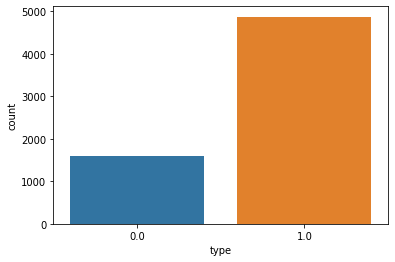

In [ ]:
sns.countplot(x = 'type', data = data_full)

<Figure size 432x288 with 0 Axes>

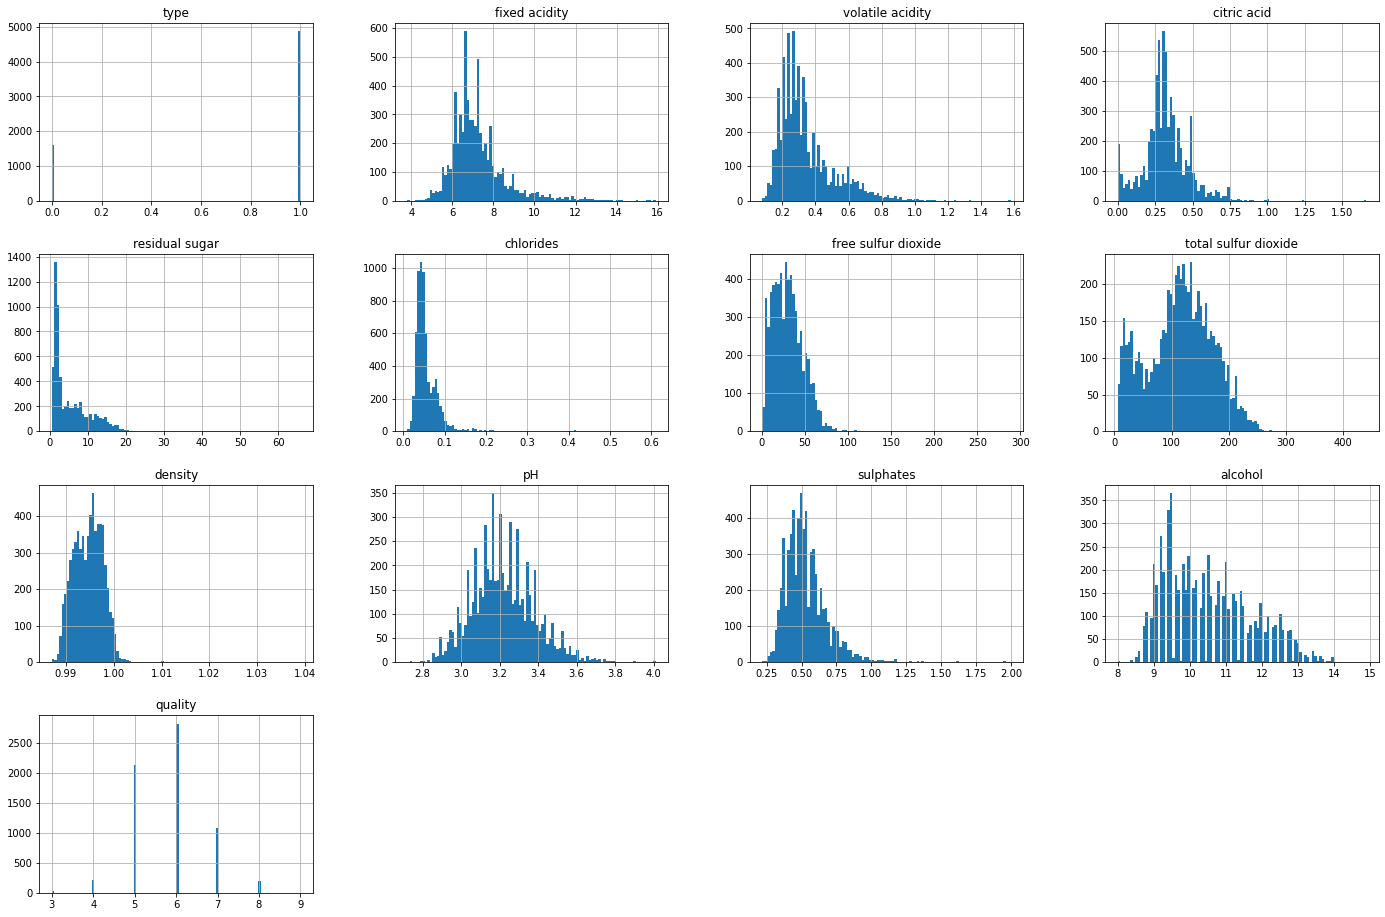

In [ ]:
plt.tight_layout()
data_full.hist(bins = 100, figsize = (24, 16))
plt.show()

Как мы видим, большинство признаков (кроме признака «type», который является бинарным признаком) нормально распределены.

Теперь мы покажем корреляцию между каждой функцией с другой, используя тепловую карту (матрицу корреляции).

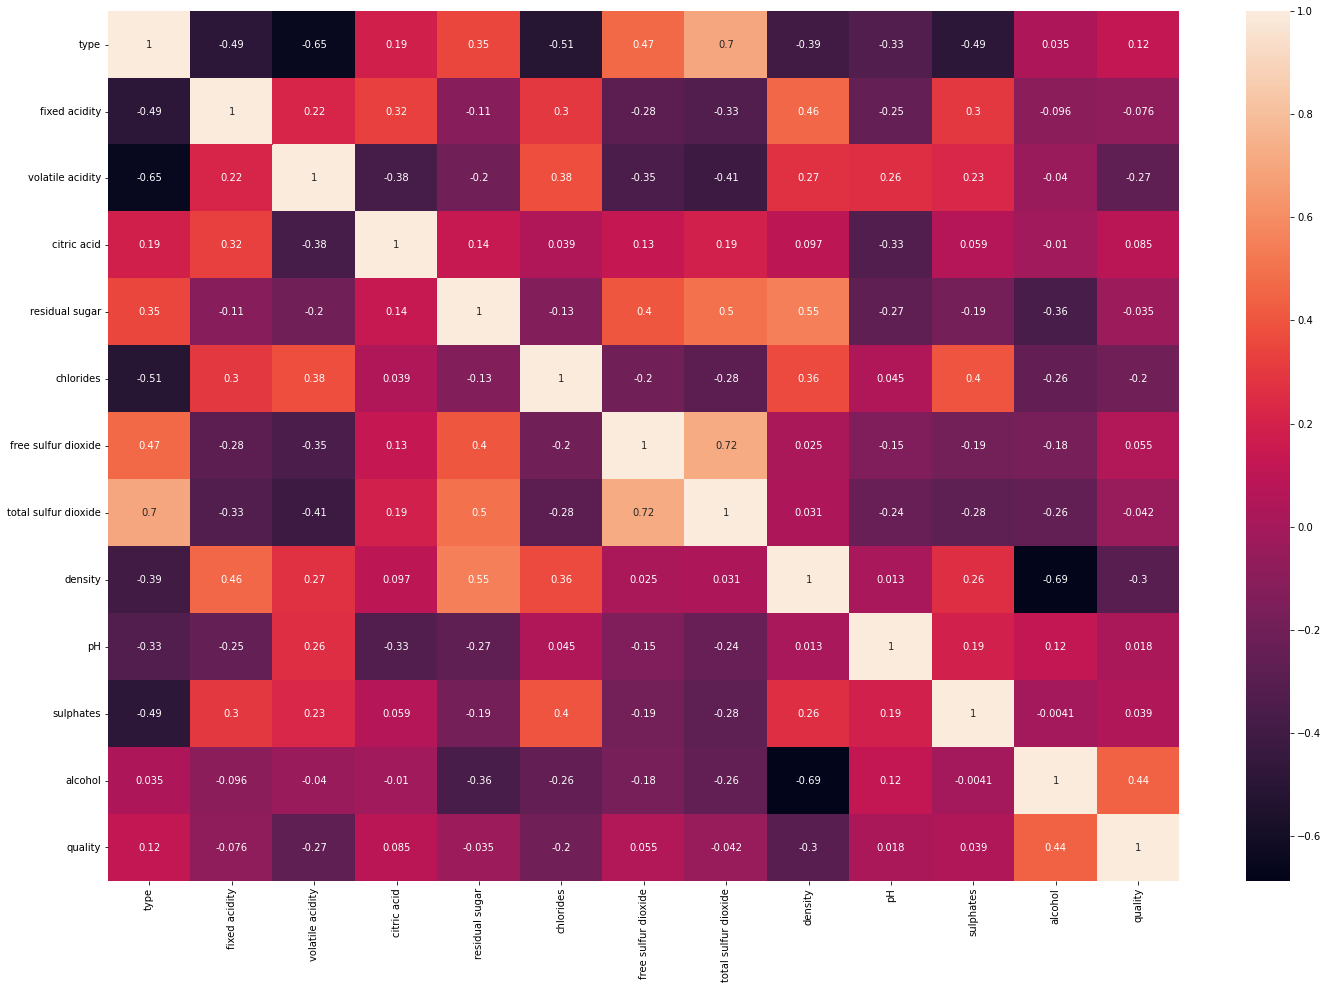

In [ ]:
plt.figure(figsize = (24, 16))
sns.heatmap(data_full.corr(), annot = True)
plt.show()

Поскольку мы устанавливаем, что если корреляция выше 0.7 между признаками, которые не совпадают, мы говорим, что корреляция достаточно высока, поэтому мы можем удалить один из коррелированных признаков. Следовательно, мы решили удалить «total sulfur dioxide».

In [ ]:
data_full = data_full.drop('total sulfur dioxide',axis=1)
data_full = pd.get_dummies(data_full, drop_first=True)
data_full.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


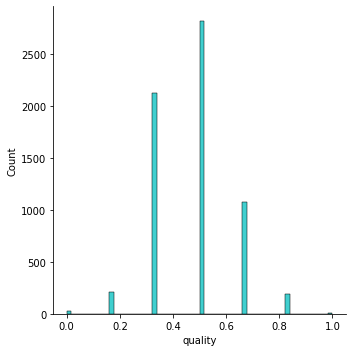

In [ ]:
sns.displot(x = data_full['quality'], kde = False, color = 'c')

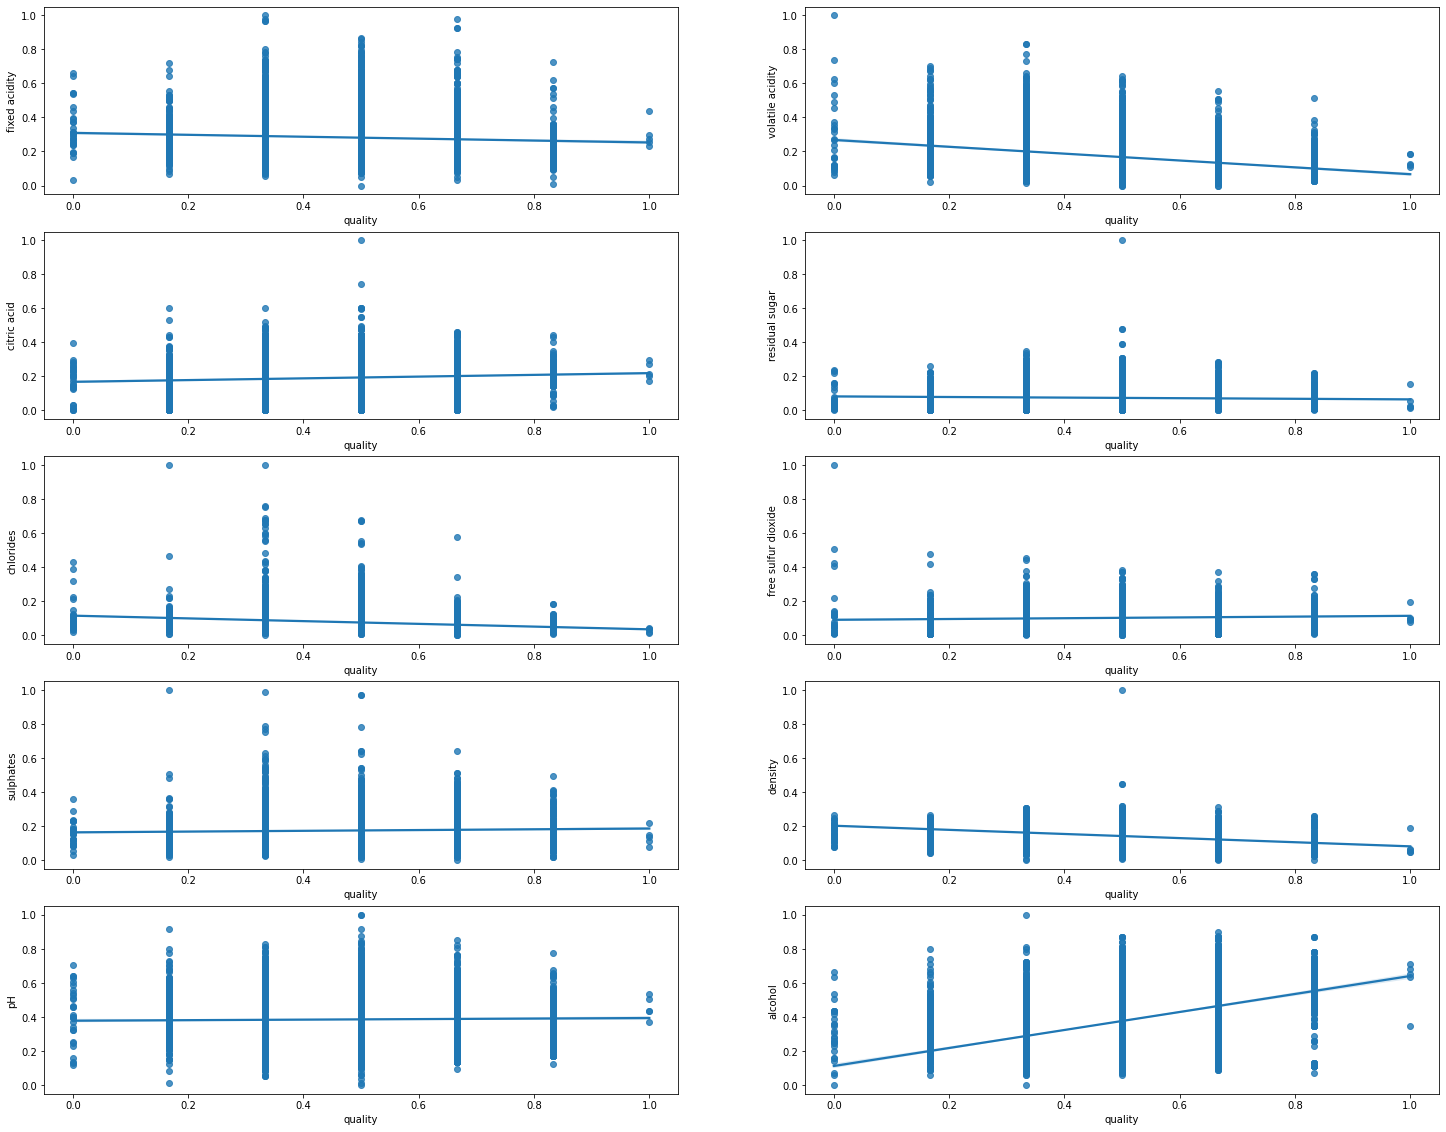

In [ ]:
f, x = plt.subplots(5, 2, figsize = (25, 20)) 
sns.regplot(x = data_full['quality'], y = data_full['fixed acidity'], ax = x[0, 0])
sns.regplot(x = data_full['quality'], y = data_full['volatile acidity'], ax = x[0, 1])
sns.regplot(x = data_full['quality'], y = data_full['citric acid'], ax = x[1, 0])
sns.regplot(x = data_full['quality'], y = data_full['residual sugar'], ax = x[1, 1])
sns.regplot(x = data_full['quality'], y = data_full['chlorides'], ax = x[2, 0])
sns.regplot(x = data_full['quality'], y = data_full['free sulfur dioxide'], ax = x[2, 1])
sns.regplot(x = data_full['quality'], y = data_full['sulphates'], ax = x[3, 0])
sns.regplot(x = data_full['quality'], y = data_full['density'], ax = x[3, 1])
sns.regplot(x = data_full['quality'], y = data_full['pH'], ax = x[4, 0])
sns.regplot(x = data_full['quality'], y = data_full['alcohol'], ax = x[4, 1])

# 4. Нормализация данных

Поскольку наш набор данных несбалансирован (т. Е. Есть функции, которые имеют высокие диапазоны по отношению к другим), мы нормализуем наши значения от 0 до 1.

In [ ]:
scaler = MinMaxScaler()

# A numpy array containing the normalized values
data_fit = scaler.fit(data_full)
data_fit = data_fit.transform(data_full)

In [ ]:
data_full = pd.DataFrame(data_fit, columns=['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','density','pH','sulphates','alcohol','quality'])
data_full.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,0.115942,0.5
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,0.217391,0.5
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,0.304348,0.5
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5


In [ ]:
data_full = pd.get_dummies(data_full, drop_first=True)
data_full

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,0.115942,0.500000
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,0.217391,0.500000
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,0.304348,0.500000
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.500000
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
6458,0.0,0.247934,0.360000,0.048193,0.019939,0.098007,0.093750,0.181222,0.542636,0.337079,0.217391,0.500000
6459,0.0,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.150183,0.565891,0.202247,0.362319,0.333333
6460,0.0,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.166377,0.542636,0.297753,0.434783,0.500000
6461,0.0,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.161172,0.658915,0.275281,0.318841,0.333333


# 5. Разделение данных

Разделим данные на два класса, в зависимости от качества вина.

In [ ]:
data_full['Excellent quality'] = [ 1 if x>=0.765 else 0 for x in data_full.quality] 
y = data_full["Excellent quality"]
X = data_full.drop(['Excellent quality' ,'quality'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# 6. Создание и обучение моделей

### 6.1 KNN Модель

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)


lr =(accuracy_score(y_test,y_pred1))
print(lr)

0.9621036349574633


### 6.2 Модель DecisionTreeClassifier

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

dt =(accuracy_score(y_test, y_pred2))
print(dt)

0.9574632637277649


### 6.3 Модель RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)


rf =(accuracy_score(y_test, y_pred3))
print(rf)

0.9752513534416086


### 6.4 Модель SVM

In [ ]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

svm = (accuracy_score(y_test, y_pred4))
print(svm) 

0.9667440061871616


# 7. Результаты

In [ ]:
models = pd.DataFrame({'models' : ["Knn" , "Decision Tree" , "RandomForest" , "SVM"] , 'Acurracy score' : [lr,dt,rf,svm]})
models.sort_values(by ="Acurracy score" ,  ascending = False)

,models,Acurracy score
2,RandomForest,0.975251
3,SVM,0.966744
0,Knn,0.962104
1,Decision Tree,0.957463
